In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

import warnings
warnings.filterwarnings('ignore')


### Loading the data

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/ds-mahbub/24MLE01_Machine-Learning-Engineer/KNN/Classification/data/music_clean.csv?token=GHSAT0AAAAAACP2WUFLZ7VNBGQXSAR2SIQ6ZP5RXUQ')
df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


### Data Cleaning

In [6]:
df.isna().sum()

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


### Data Preprocessing

In [10]:
# dividing the dataset into features and target variables
X = df.drop('genre', axis = 1) # Features
y = df['genre']
# Spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23, stratify = y)

# Creating a pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')), # for imputing missing values
    ('scaler', StandardScaler()), # this will ensure that the data is in the same scale
    ('feature_selection', SelectKBest(k = 'all')), # Selecting Features
    ('classifier', KNeighborsClassifier())
])

# fitting the train data into the pipeline to go through all steps
pipeline.fit(X_train, y_train)

# getting predictions
y_pred = pipeline.predict(X_test)

# Evaluating the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76       100
           1       0.73      0.90      0.81       100

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.78       200
weighted avg       0.80      0.79      0.78       200



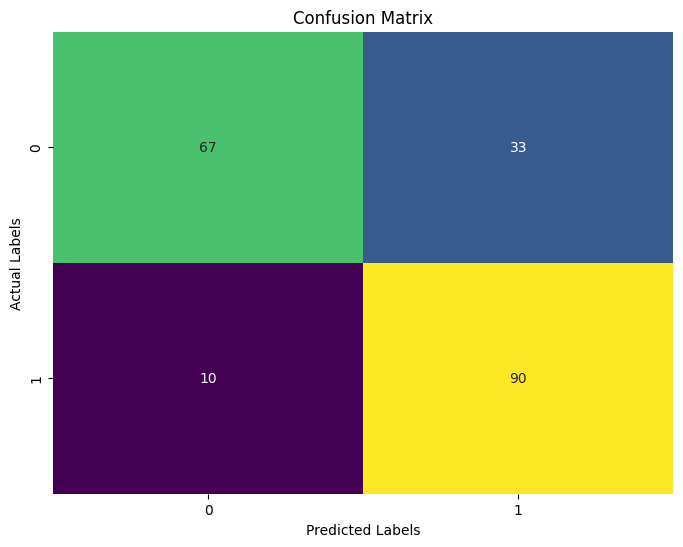

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot= True, fmt = 'd', cmap='viridis', cbar= False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix সমাচারঃ
- <b>True Positives (TP):</b> Actual & Predicted both are Positive (পজিটিভ আছে এবং পজিটিভ হিসেবেই প্রেডিক্ট করেছে।)
- <b>False Positives (FP):</b> Actual Negative, Model Predicted as Positive (নেগেটিভকে পজিটিভ বলেছে)
- <b>True Negatives (TN):</b> Actual & Predicted both are Negative (নেগেটিভ আছে এবং নেগেটিভ হিসেবেই প্রেডিক্ট করেছে।)
- <b>False Negatives:</b> Actual Negative, Model Predicted as Positve

In [12]:

# Confusion Matrix Details:
TP = 90
FP = 10
TN = 67
FN = 33 
precision = TP / (TP + FP)
recall = TP / (TP + FN)

f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Precision: {precision}\nRecall: {recall:.2f}\nf1_score: {f1_score:.2f}')

Precision: 0.9
Recall: 0.73
f1_score: 0.81


### Improving the performance 

In [13]:
X.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300


In [14]:
y.tail()

995    0
996    0
997    0
998    0
999    0
Name: genre, dtype: int64

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

In [16]:
print(model.feature_importances_)

[0.3709598  0.05580627 0.07456699 0.04248101 0.05704335 0.06658243
 0.04262617 0.05250287 0.13553519 0.05105928 0.05083664]


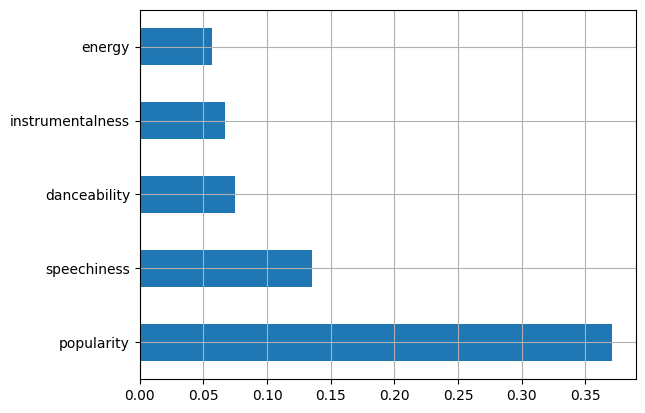

In [17]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.grid()
plt.show()

In [18]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidian', 'manhattan']
}
knn = KNeighborsClassifier()

# Grid Search CV
grid_search = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X, y)


# best params
best_params = grid_search.best_params_

best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}\nBest Score: {best_score}')

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Best Score: 0.583


In [19]:
param_dist = {
    'n_neighbors': randint(1, 20),  # random integers from 1 to 20
    'weights': ['uniform', 'distance'],  # try different weighting schemes
    'metric': ['euclidean', 'manhattan']  # try different distance metrics
}


random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X, y)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
best_score = random_search.best_score_
print("Best Cross-Validation Score:", best_score)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
Best Cross-Validation Score: 0.583


In [20]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.7825, 3: 0.7725, 4: 0.70875, 5: 0.69, 6: 0.67375, 7: 0.67625, 8: 0.65125, 9: 0.65375, 10: 0.66, 11: 0.67125, 12: 0.6475} 
 {1: 0.535, 2: 0.53, 3: 0.545, 4: 0.54, 5: 0.54, 6: 0.575, 7: 0.57, 8: 0.56, 9: 0.565, 10: 0.565, 11: 0.565, 12: 0.605}


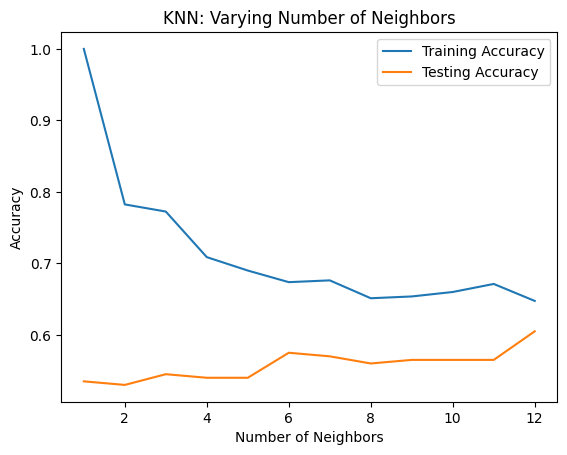

In [21]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()